In [ ]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## Homework 3

Due 12/10 10am. No submissions will be accepted after 12/13 9am.

In this  homework you will create CNN models of the CIFAR-10 and CIFAR-100 datasets which are available as PyTorch and Tensorflow datasets. Info about these datasets can be found at https://www.cs.toronto.edu/~kriz/cifar.html

All parts must be able to run on Google colab using GPUs.

**All work must be your own work.** If you copy something from the internet, include the link.

Make sure all the output is shown.

Name your submission your_rcsid_HW3.ipynb

There are three parts to the assignment:

1) Tensorflow Model (40 pts)  
2) Pytorch Model (40 pts)  
3) Pretrained Mode (20 pts)  

Points for each part are in () after the part number.

### 1. Tensorflow Model

#### 1.1(1) Tensorflow imports

Display Version

In [ ]:
# Your Code Here
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model 
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import LeakyReLU

from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import load_model,save_model

tf.__version__

'2.7.0'

#### 1.2(2) Load the CIFAR10 data into Training and Test sets. Display the shapes.

In [ ]:
# Your Code Here
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

(X_train,y_train), (X_test,y_test) = cifar10.load_data()

X_train.shape,y_train.shape,X_test.shape,y_test.shape


170508288/170498071 [==============================] - 2s 0us/step


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

#### 1.3(2) Data Preprocessing
Reshape each image to a 4-d array, convert to floating point and scale.

Display 5 training values and 5 test values

In [ ]:
# Your Code Here
X_train = X_train.reshape(-1, 32, 32, 3)
X_test = X_test.reshape(-1, 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.
X_test = X_test / 255.

X_train[0:5], X_test[0:5]

(array([[[[0.23137255, 0.24313726, 0.24705882],
          [0.16862746, 0.18039216, 0.1764706 ],
          [0.19607843, 0.1882353 , 0.16862746],
          ...,
          [0.61960787, 0.5176471 , 0.42352942],
          [0.59607846, 0.49019608, 0.4       ],
          [0.5803922 , 0.4862745 , 0.40392157]],
 
         [[0.0627451 , 0.07843138, 0.07843138],
          [0.        , 0.        , 0.        ],
          [0.07058824, 0.03137255, 0.        ],
          ...,
          [0.48235294, 0.34509805, 0.21568628],
          [0.46666667, 0.3254902 , 0.19607843],
          [0.47843137, 0.34117648, 0.22352941]],
 
         [[0.09803922, 0.09411765, 0.08235294],
          [0.0627451 , 0.02745098, 0.        ],
          [0.19215687, 0.10588235, 0.03137255],
          ...,
          [0.4627451 , 0.32941177, 0.19607843],
          [0.47058824, 0.32941177, 0.19607843],
          [0.42745098, 0.28627452, 0.16470589]],
 
         ...,
 
         [[0.8156863 , 0.6666667 , 0.3764706 ],
          [0.78823

#### 1.4(2) Encode the dependent variable. 

Display the shapes.

In [ ]:
# Your Code Here
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
print('One hot shape ',y_test_one_hot.shape)


One hot shape  (10000, 10)


#### 1.5(2) Split training data into training data and validation data. 

Use 20% of the data for validation. Display the shapes.


In [ ]:
# Your Code Here
train_X,valid_X,train_label,valid_label = train_test_split(X_train, y_train_one_hot, test_size=0.2, random_state=13)
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape


((40000, 32, 32, 3), (10000, 32, 32, 3), (40000, 10), (10000, 10))

#### 1.6 (15) Specify model structure

Create a Tensorflow model. Experiment with different layer structures to optimize classification performance.

Keep your best one here. Summarize your results in question 1.13.

In [ ]:
# Your Code Here
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(32,32,3),
                     padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))

model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Flatten())

model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(Dense(10, activation='softmax'))


#### 1.7(2) Output a model summary.

In [ ]:
# Your Code Here
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

#### 1.8(2) Compile Model with Adam optimizer

Use appropriate loss function and use 'accuracy' as metric.

In [ ]:
# Your Code Here
model.compile(loss=tf.keras.losses.categorical_crossentropy, 
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])


#### 1.9(2) Train the model with training and validation data.

Experiment with different batch sizes. Summarize your results in 1.13.

In [ ]:
# Your Code Here
batch_size = 64 #128,256 # Minibatch size
epochs = 10
model_train = model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,
                        validation_data=(valid_X, valid_label))

Epoch 1/10
625/625 [==============================] - 24s 19ms/step - loss: 1.4496 - accuracy: 0.4770 - val_loss: 1.1176 - val_accuracy: 0.5965
Epoch 2/10
625/625 [==============================] - 11s 18ms/step - loss: 0.9926 - accuracy: 0.6520 - val_loss: 0.9930 - val_accuracy: 0.6574
Epoch 3/10
625/625 [==============================] - 11s 18ms/step - loss: 0.8108 - accuracy: 0.7170 - val_loss: 0.8303 - val_accuracy: 0.7104
Epoch 4/10
625/625 [==============================] - 11s 18ms/step - loss: 0.6837 - accuracy: 0.7606 - val_loss: 0.7905 - val_accuracy: 0.7253
Epoch 5/10
625/625 [==============================] - 11s 18ms/step - loss: 0.5721 - accuracy: 0.7985 - val_loss: 0.7725 - val_accuracy: 0.7401
Epoch 6/10
625/625 [==============================] - 11s 18ms/step - loss: 0.4731 - accuracy: 0.8330 - val_loss: 0.8074 - val_accuracy: 0.7340
Epoch 7/10
625/625 [==============================] - 11s 18ms/step - loss: 0.3910 - accuracy: 0.8622 - val_loss: 0.8267 - val_accuracy:

#### 1.10(1) Plot the training and validation loss

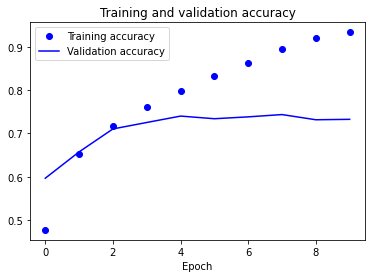

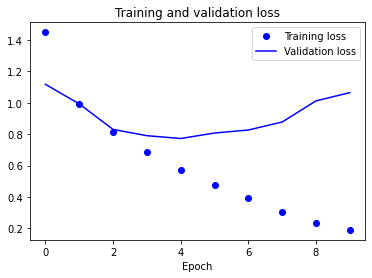

In [ ]:
# Your Code Here
accuracy = model_train.history['accuracy']
val_accuracy = model_train.history['val_accuracy']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.xlabel("Epoch")
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel("Epoch")
plt.title('Training and validation loss')
plt.legend();

#### 1.11(2) Evaluate model on the test set

Display test loss and accuracy

In [ ]:
# Your Code Here
test_eval = model.evaluate(X_test, y_test_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])


Test loss: 1.0680099725723267
Test accuracy: 0.7368000149726868


#### 1.12(2) Predict the classes of the test data

Display Confusion Matrix and accuracy.

In [ ]:
# Your Code Here
predicted_classes = model.predict(X_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
cm = confusion_matrix(predicted_classes,y_test)
print(cm)

print(f'Accuracy: {np.trace(cm)/np.sum(cm)}')


[[745  21  91  89  71  67  42  55  65  41]
 [ 13 842   9   8   7   4  12   6  23  72]
 [ 86   7 645  66  56  49  30  26  14   6]
 [ 19   9  51 571  44 180  71  31  13  15]
 [ 26   7  70  70 711  52  37  88   4   3]
 [  5   3  36 100  21 573  13  43   5   4]
 [ 11   7  47  48  27  18 784   4   5   2]
 [  9   2  27  30  53  40   2 729   2   9]
 [ 49  17  11   8   8   8   4   2 852  24]
 [ 37  85  13  10   2   9   5  16  17 824]]
Accuracy: 0.7276


#### 1.13(5) Your summary of the experiments you conducted

### 2. PyTorch Model

In [ ]:
def conv_image_size(layers,size_in,padding=0,kernel=3,stride=2,dilation=1):
    for _ in range(layers):
        size_in = np.floor(((size_in+2*padding - dilation*(kernel-1)-1)/stride)+1)
    return int(size_in)


####  Install pytorch-model-summary if not installed. It is not installed in colab.

In [ ]:
!pip install pytorch-model-summary


#### 2.1(1) PyTorch imports

Display PyTorch Version

In [ ]:
# Your Code Here
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torchvision import models
from pytorch_model_summary import summary
torch.__version__


'1.10.0+cu111'

#### 2.2(1) Set PyTorch device

Display the device

In [ ]:
# Your Code Here
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)


cuda:0


#### 2.3 (2) Load the CIFAR100 Training and Test datasets as tensors

Display the data shape

In [ ]:
# Your Code Here
train_dataset = torchvision.datasets.CIFAR100(
    root='.',
    train=True,
    transform=transforms.ToTensor(),
    download=True)
test_dataset = torchvision.datasets.CIFAR100(
    root='.',
    train=False,
    transform=transforms.ToTensor(),
    download=True)
train_dataset.data.shape, test_dataset.data.shape

  0%|          | 0/169001437 [00:00<?, ?it/s]

Extracting ./cifar-100-python.tar.gz to .
Files already downloaded and verified


((50000, 32, 32, 3), (10000, 32, 32, 3))

#### 2.4 (10) Define and instantiate the model

Create a PyTorch model. Experiment with different layer structures to optimize classification performance.

Keep your best one here. Summarize your results in question 2.11.


In [ ]:
# Your Code Here
class CNN(nn.Module):
  def __init__(self, K):
    super(CNN, self).__init__()
    self.conv_layers = nn.Sequential(
      nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=2),
      nn.ReLU(),
      nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=2),
      nn.ReLU(),
      nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=2),
      nn.ReLU()
    )
    
    self.flatten = nn.Flatten()
    
    self.dense_layers = nn.Sequential(
      nn.Dropout(0.2),
      nn.Linear(128 * inp_sz * inp_sz, 512),
      nn.ReLU(),
      nn.Dropout(0.2),
      nn.Linear(512, K)
    )
   
  
  def forward(self, X):
    z = self.conv_layers(X)
    z = self.flatten(z)
    out = self.dense_layers(z) # Softmax done in CrossEntopy Loss
    return out


#### 2.5(2) Print a summary

In [ ]:
# Your Code Here
K = len(set(train_dataset.targets))
inp_sz = conv_image_size(3,32)
model = CNN(K)
model.to(device)
print(summary(model,torch.zeros((1,3,32,32)).to(device),show_input=False,show_hierarchical=False))


-----------------------------------------------------------------------
      Layer (type)        Output Shape         Param #     Tr. Param #
          Conv2d-1     [1, 32, 15, 15]             896             896
            ReLU-2     [1, 32, 15, 15]               0               0
          Conv2d-3       [1, 64, 7, 7]          18,496          18,496
            ReLU-4       [1, 64, 7, 7]               0               0
          Conv2d-5      [1, 128, 3, 3]          73,856          73,856
            ReLU-6      [1, 128, 3, 3]               0               0
         Flatten-7           [1, 1152]               0               0
         Dropout-8           [1, 1152]               0               0
          Linear-9            [1, 512]         590,336         590,336
           ReLU-10            [1, 512]               0               0
        Dropout-11            [1, 512]               0               0
         Linear-12            [1, 100]          51,300          51,300
Total

#### 2.6(1) Define Loss and optimizer

In [ ]:
# Your Code Here
criterion = nn.CrossEntropyLoss() # Applies the softmax function
optimizer = torch.optim.Adam(model.parameters())


#### 2.7 (2) Create Data loaders

The data loader automatically generates batches in the training loop and takes care of shuffling the data

In [ ]:
# Your Code Here
batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)


### 2.8(5) Train the Model 

Display Epoch, train loss test loss and time of execution of epoch.

In [ ]:
# Your Code Here
def mini_batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs,device):
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for it in range(epochs):
    model.train() # Set training mode
    t0 = datetime.now()
    train_loss = []
    for inputs, targets in train_loader:
      # move data to device
      inputs, targets = inputs.to(device), targets.to(device)
     
      # zero the parameter gradients
      optimizer.zero_grad()

      # Forward pass
      outputs = model(inputs)
      loss = criterion(outputs, targets)
        
      # Backward and optimize
      loss.backward()
      optimizer.step()

      train_loss.append(loss.item())

    # Get train loss and test loss
    
    train_loss = np.mean(train_loss) 
    
    test_loss = []
    model.train(False) # Set test model aka model.eval()
    for inputs, targets in test_loader:
      inputs, targets = inputs.to(device), targets.to(device)
      outputs = model(inputs)
      loss = criterion(outputs, targets)
      test_loss.append(loss.item())
    test_loss = np.mean(test_loss)

    # Save losses
    train_losses[it] = train_loss
    test_losses[it] = test_loss
    
    dt = datetime.now() - t0
    print(f'Epoch {it+1}/{epochs}, Train Loss: {train_loss:.4f}, \
      Test Loss: {test_loss:.4f}, Duration: {dt}')
  
  return train_losses, test_losses

train_losses, test_losses = mini_batch_gd(
    model, criterion, optimizer, train_loader, test_loader, epochs=15,device=device)


Epoch 1/15, Train Loss: 3.9117,       Test Loss: 3.5277, Duration: 0:00:14.198828
Epoch 2/15, Train Loss: 3.3660,       Test Loss: 3.1950, Duration: 0:00:14.004826
Epoch 3/15, Train Loss: 3.1139,       Test Loss: 2.9921, Duration: 0:00:14.077917
Epoch 4/15, Train Loss: 2.9407,       Test Loss: 2.8968, Duration: 0:00:14.025549
Epoch 5/15, Train Loss: 2.8152,       Test Loss: 2.8029, Duration: 0:00:14.135564
Epoch 6/15, Train Loss: 2.6950,       Test Loss: 2.7486, Duration: 0:00:14.108168
Epoch 7/15, Train Loss: 2.5860,       Test Loss: 2.7163, Duration: 0:00:14.022065
Epoch 8/15, Train Loss: 2.4892,       Test Loss: 2.6816, Duration: 0:00:14.088546
Epoch 9/15, Train Loss: 2.3935,       Test Loss: 2.6338, Duration: 0:00:14.093442
Epoch 10/15, Train Loss: 2.3231,       Test Loss: 2.5973, Duration: 0:00:14.103027
Epoch 11/15, Train Loss: 2.2483,       Test Loss: 2.6190, Duration: 0:00:14.051664
Epoch 12/15, Train Loss: 2.1732,       Test Loss: 2.5773, Duration: 0:00:14.068263
Epoch 13/15, 

#### 2.9 (1) Plot the train loss and test loss per iteration

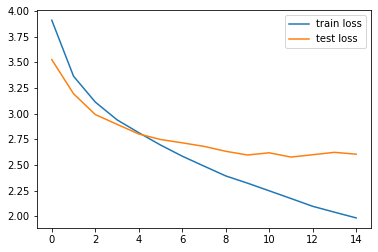

In [ ]:
# Your Code Here
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()


#### 2.10(10) Predict the Test Data 

Display Confusion Matrix and accuracy.

In [ ]:
# Your Code Here
x_test = test_dataset.data
y_test = test_dataset.targets

pred_test = np.array([])

model.eval()
for inputs, targets in test_loader:
  # move data to GPU
  inputs, targets = inputs.to(device), targets.to(device)

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  _, predictions = torch.max(outputs, 1)
  
  # update pred_test
  pred_test = np.concatenate((pred_test, predictions.cpu().numpy()))

cm = confusion_matrix(y_test, pred_test)
print(cm)

print(f'Accuracy = {np.trace(cm)/np.sum(cm)}')


[[64  1  0 ...  0  0  0]
 [ 1 52  2 ...  1  0  0]
 [ 0  0 27 ...  0 10  1]
 ...
 [ 0  0  0 ... 33  2  1]
 [ 0  0  7 ...  1 18  3]
 [ 0  0  0 ...  1  0 34]]
Accuracy = 0.3642


#### 2.11(5) Your summary of the experiments you conducted

### 3.0 Pretrained

#### 3.1 (1) Load a PyTorch pretrained ResNet50 model

In [ ]:
# Your Code Here
res50 = models.resnet50(pretrained=True) 


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

#### 3.2 (4) Print a summary

In [ ]:
# Your Code Here
model = res50
print(summary(model,torch.zeros((1,3,32,32)),show_input=True))


----------------------------------------------------------------------------
           Layer (type)         Input Shape         Param #     Tr. Param #
               Conv2d-1      [1, 3, 32, 32]           9,408           9,408
          BatchNorm2d-2     [1, 64, 16, 16]             128             128
                 ReLU-3     [1, 64, 16, 16]               0               0
            MaxPool2d-4     [1, 64, 16, 16]               0               0
           Bottleneck-5       [1, 64, 8, 8]          75,008          75,008
           Bottleneck-6      [1, 256, 8, 8]          70,400          70,400
           Bottleneck-7      [1, 256, 8, 8]          70,400          70,400
           Bottleneck-8      [1, 256, 8, 8]         379,392         379,392
           Bottleneck-9      [1, 512, 4, 4]         280,064         280,064
          Bottleneck-10      [1, 512, 4, 4]         280,064         280,064
          Bottleneck-11      [1, 512, 4, 4]         280,064         280,064
          B

#### 3.3 (5) Modify model for CIFAR10 dataset. 
Set requires_grad attribute of all the parameters to False

Replace last layer with a Linear Layer with the correct number of inputs and outputs.

Hint: Use summary above and see https://discuss.pytorch.org/t/how-to-modify-the-final-fc-layer-based-on-the-torch-model/766

In [ ]:
# Your Code Here
for param in model.parameters():
    param.requires_grad = False
    # Replace the last fully-connected layer
    # Parameters of newly constructed modules have requires_grad=True by default
model.fc = nn.Linear(2048, 10)


#### 3.4 (2) Send model to device and print summary

In [ ]:
# Your Code Here
model.to(device)
print(summary(model,torch.zeros((1,3,32,32)).to(device),show_input=False,show_hierarchical=False))



----------------------------------------------------------------------------
           Layer (type)        Output Shape         Param #     Tr. Param #
               Conv2d-1     [1, 64, 16, 16]           9,408               0
          BatchNorm2d-2     [1, 64, 16, 16]             128               0
                 ReLU-3     [1, 64, 16, 16]               0               0
            MaxPool2d-4       [1, 64, 8, 8]               0               0
           Bottleneck-5      [1, 256, 8, 8]          75,008               0
           Bottleneck-6      [1, 256, 8, 8]          70,400               0
           Bottleneck-7      [1, 256, 8, 8]          70,400               0
           Bottleneck-8      [1, 512, 4, 4]         379,392               0
           Bottleneck-9      [1, 512, 4, 4]         280,064               0
          Bottleneck-10      [1, 512, 4, 4]         280,064               0
          Bottleneck-11      [1, 512, 4, 4]         280,064               0
          B

#### 3.5 (4) Load the CIFAR10 training dataset and retrain the model.

Print the epoch, training loss and time of execution of each epoch.

In [ ]:
# Your Code Here
train_dataset = torchvision.datasets.CIFAR10(
    root='.',
    train=True,
    transform=transforms.ToTensor(),
    download=True)
test_dataset = torchvision.datasets.CIFAR10(
    root='.',
    train=False,
    transform=transforms.ToTensor(),
    download=True)
batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)
train_losses, test_losses = mini_batch_gd(
    model, criterion, optimizer, train_loader, test_loader, epochs=15,device=device)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1/15, Train Loss: 2.4061,       Test Loss: 2.4138, Duration: 0:00:35.171278
Epoch 2/15, Train Loss: 2.4054,       Test Loss: 2.4076, Duration: 0:00:34.840774
Epoch 3/15, Train Loss: 2.4066,       Test Loss: 2.4077, Duration: 0:00:34.924359
Epoch 4/15, Train Loss: 2.4073,       Test Loss: 2.4074, Duration: 0:00:34.826416
Epoch 5/15, Train Loss: 2.4058,       Test Loss: 2.4110, Duration: 0:00:34.866653
Epoch 6/15, Train Loss: 2.4066,       Test Loss: 2.4114, Duration: 0:00:34.845803
Epoch 7/15, Train Loss: 2.4055,       Test Loss: 2.4072, Duration: 0:00:34.886701


KeyboardInterrupt: ignored

#### 3.6 (1) Plot the Training Loss

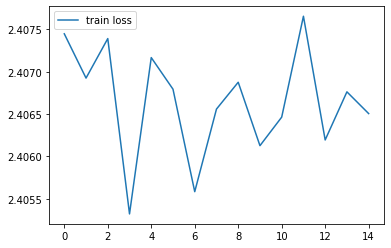

In [ ]:
# Your Code Here
plt.plot(train_losses, label='train loss')
plt.legend()
plt.show()


#### 3.7 (3) Load the test CIFAR10 dataset and predict the Test dataset.

Display the Confusion Matrix and accuracy

In [ ]:
# Your Code Here
x_test = test_dataset.data
y_test = test_dataset.targets

pred_test = np.array([])

model.eval()
for inputs, targets in test_loader:
  # move data to GPU
  inputs, targets = inputs.to(device), targets.to(device)

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  _, predictions = torch.max(outputs, 1)
  
  # update pred_test
  pred_test = np.concatenate((pred_test, predictions.cpu().numpy()))

cm = confusion_matrix(y_test, pred_test)
print(cm)

print(f'Accuracy = {np.trace(cm)/np.sum(cm)}')



[[ 56  19 160  40 254 168 240  17  41   5]
 [ 30  19 178  52 256 142 246  23  46   8]
 [ 59  28 161  45 276 152 218  20  37   4]
 [ 31  31 189  47 234 144 244  10  64   6]
 [ 54  35 122  61 243 152 248  29  50   6]
 [ 37  28 215  51 193 136 252  14  66   8]
 [ 59  29 171  46 238 117 239  18  80   3]
 [ 39  18 148  61 256 151 252  14  57   4]
 [ 37  18 149  35 265 172 257  11  41  15]
 [ 29  12 121  53 270 141 301  14  49  10]]
Accuracy = 0.0966
